<a href="https://colab.research.google.com/github/Rajeeb321123/Machine-learning-Journey/blob/master/20_thompson_sampling_reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

Remember 1000 rounds was the lowest we got in UCB before model start showing wrong answer (other than 4)

> `Looks like Thompson Sampling can go as low as 500 and still show the right answer (which is 4). Further more we can as low 100 rounds and still show satisfactory results, this is incredible`

> `Thompson Sampling is seems to be more powerful and faster model than UCB in most cas`

In [32]:
#1000 rounds
import random
N = 1000
d = 10
ads_selected = []

numbers_of_rewards_1 = [0] * 10 # no of adverstisement got reward of 1
numbers_of_rewards_0 = [0] * 10 # no of adverstisement got reward of 0
total_reward = 0

for n in range(0, N): # for rounds/users
  ad = 0
  max_random = 0
  for i in range(0, d):
    # random use bayes inference to randomly select taking account of success rate. See bernuali an bayes infrence visualization in youtube
    random_beta = random.betavariate(alpha=numbers_of_rewards_1[i] + 1, beta = numbers_of_rewards_0[i] + 1) # taking the random variable

    if (random_beta > max_random) :
      ad = i
      max_random = random_beta

  ads_selected.append(ad)

  reward = dataset.values[n, ad]
  if (reward == 1 ): # if randomely selected is success or 1
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  if (reward == 0): # if randomely selected is success or 1
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

## Visualising the results - Histogram

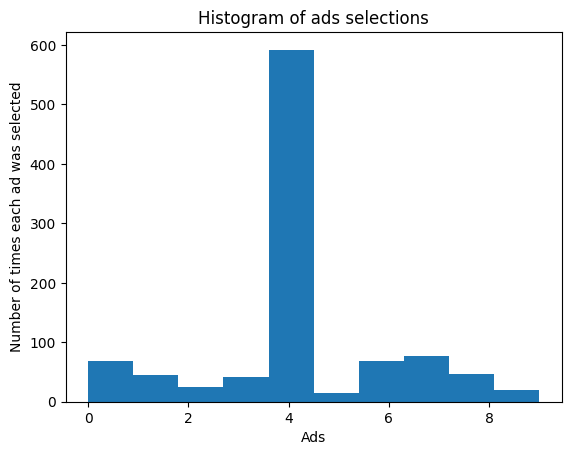

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

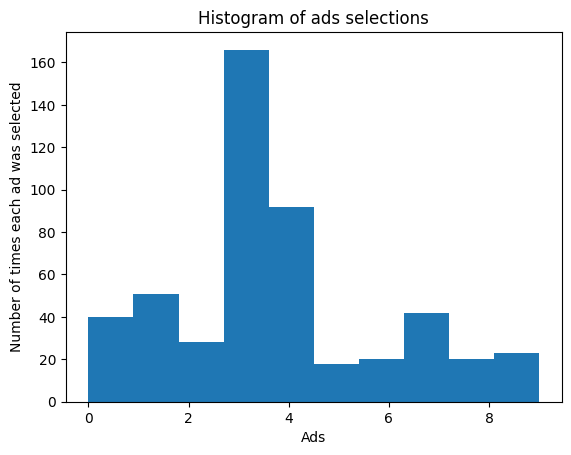

In [36]:
#500 rounds
import random
N = 500
d = 10
ads_selected = []

numbers_of_rewards_1 = [0] * 10 # no of adverstisement got reward of 1
numbers_of_rewards_0 = [0] * 10 # no of adverstisement got reward of 0
total_reward = 0

for n in range(0, N): # for rounds/users
  ad = 0
  max_random = 0
  for i in range(0, d):
    # random use bayes inference to randomly select taking account of success rate. See bernuali an bayes infrence visualization in youtube
    random_beta = random.betavariate(alpha=numbers_of_rewards_1[i] + 1, beta = numbers_of_rewards_0[i] + 1) # taking the random variable

    if (random_beta > max_random) :
      ad = i
      max_random = random_beta

  ads_selected.append(ad)

  reward = dataset.values[n, ad]
  if (reward == 1 ): # if randomely selected is success or 1
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  if (reward == 0): # if randomely selected is success or 1
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

# Bar graph
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()